In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
data = pd.read_csv('airline-passengers.csv')
dataFrame = pd.DataFrame(data)
dataFrame

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [139]:
dataFrame.shape

(144, 2)

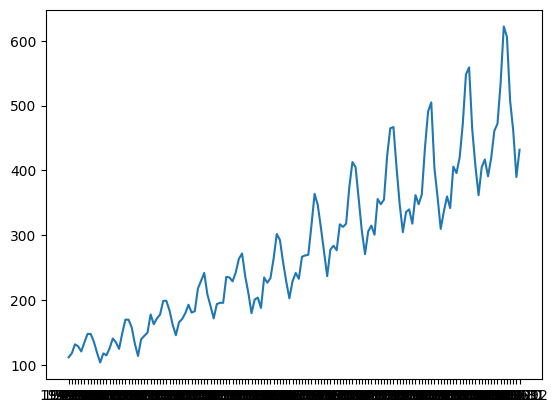

In [140]:
x = data['Month']
y = data['Passengers']
plt.plot(x,y)

In [141]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # Mencari n akhir
    end_ix = i + n_steps
    # Memeriksa urutan terluar dari data
    if end_ix > len(sequence)-1:
      break
    # Menambahkan bagian input dan output
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

# Menentukan Waktu dari data time series
jmlh_X = 4
print('Shapes Target = ',y.shape)
#Split data fitur dan target
X, y = split_sequence(y, jmlh_X)
print('Shapes X = ',X.shape)
print('Shapes Y = ',y.shape)

Shapes Target =  (144,)
Shapes X =  (140, 4)
Shapes Y =  (140,)


In [142]:
newFitur = pd.DataFrame(X, columns=['t-'+str(i+1) for i in range(jmlh_X-1, -1,-1)])
newTarget = pd.DataFrame(y, columns=['Data Prediksi'])

In [143]:
newData = pd.concat([newFitur,newTarget], axis=1)
newData

,t-4,t-3,t-2,t-1,Data Prediksi
0,112,118,132,129,121
1,118,132,129,121,135
2,132,129,121,135,148
3,129,121,135,148,148
4,121,135,148,148,136
...,...,...,...,...,...
135,461,472,535,622,606
136,472,535,622,606,508
137,535,622,606,508,461
138,622,606,508,461,390


In [155]:
training_set = newData.iloc[:100, 1:2].values
test_set = newData.iloc[100:, 1:2].values
scaler = MinMaxScaler(feature_range = (0, 1))
data_training = scaler.fit_transform(training_set)
X_train = []
y_train = []
x = 5
for i in range(x, len(training_set)):
    X_train.append(data_training[i-x:i, 0])
    y_train.append(data_training[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [158]:
xtrainbaru = np.reshape(X_train, (95, 5))
X_train.shape

(95, 5, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
modelknn=neigh.fit(xtrainbaru, y_train)

In [160]:
dataset_training = pd.DataFrame(training_set)
dataset_test = pd.DataFrame(test_set)
dataset_total = pd.concat((dataset_training, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values


In [161]:
inputs.shape

(45, 1)

In [166]:
inputs =scaler.fit_transform(inputs)
X_test = []
for i in range(5, 45):
    X_test.append(inputs[i-5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(40, 5, 1)


In [167]:
xtestbaru = np.reshape(X_test, (40, 5))

In [178]:
predicted_pakan = modelknn.predict(xtestbaru)

predicted_pakan = predicted_pakan.reshape(-1,1)
prediksi= scaler.inverse_transform(predicted_pakan)
dataset_test=dataset_test.iloc[0:40]
# prediksi.shape

(40, 1)

In [170]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(dataset_test, prediksi)

0.9991682870610903